<a href="https://colab.research.google.com/github/NFalah25/PCVK/blob/main/Week%2010/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Naufal Falah Wafiuddin
# Kelas : TI - 3A
# Absen : 23
# NIM : 214172012

##Kelompok:
####- Aido Lutfhi AL Hakim | 2141720136
####- Jauhar Maulana A'la | 2141720186
####- Naufal Falah Wafiuddin | 2141720129
Link GitHub : https://github.com/NFalah25/PCVK

1. Import folder yang ada di Drive anda dengan cara berikut

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install pytesseract

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [5]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3.  Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.


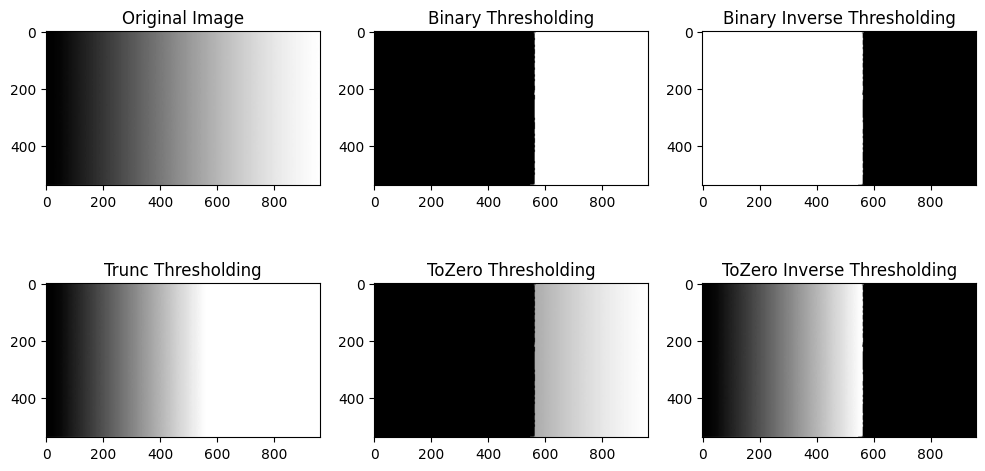

In [9]:
# Load the image using matplotlib
img = plt.imread('/content/drive/MyDrive/PCVK/image_thres/gradient.jpg')

# Set the threshold value
thresh = 170

# Create empty arrays for the thresholded images
thresh_binary = np.zeros_like(img)
thresh_binary_inv = np.zeros_like(img)
thresh_trunc = np.zeros_like(img)
thresh_tozero = np.zeros_like(img)
thresh_tozero_inv = np.zeros_like(img)

# Apply the thresholding operations
thresh_binary[img > thresh] = 255
thresh_binary_inv[img <= thresh] = 255
thresh_trunc = img.copy()
thresh_trunc[img > thresh] = thresh
thresh_tozero[img > thresh] = img[img > thresh]
thresh_tozero_inv[img <= thresh] = img[img <= thresh]
# Display the images
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


4.  Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

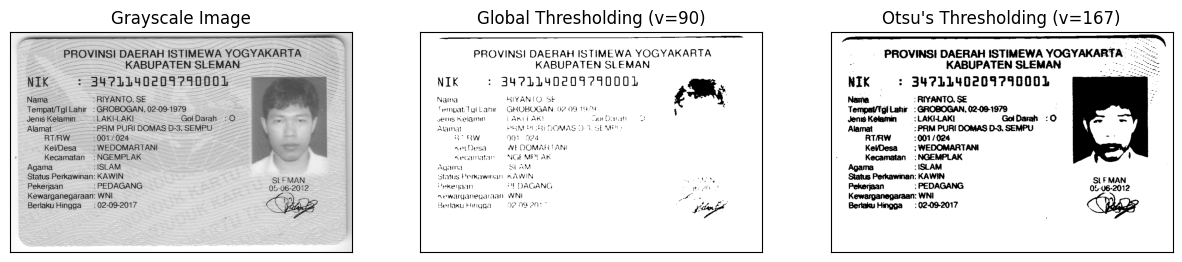

In [40]:
# Load the image using cv2 in grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/ktp/ktp.png', cv.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to the image
blur = cv.GaussianBlur(img,(5,5),0)

# Set the global threshold value
thresh_global = 90

# Apply global thresholding
global_thresh = blur.copy()
global_thresh[blur > thresh_global] = 255
global_thresh[blur <= thresh_global] = 0

# Set the specific threshold value for Otsu's thresholding
thresh_otsu = 167

# Apply Otsu's thresholding
otsu_thresh = blur.copy()
otsu_thresh[blur > thresh_otsu] = 255
otsu_thresh[blur <= thresh_otsu] = 0

# Display the images
titles = ['Grayscale Image', 'Global Thresholding (v=90)', f"Otsu's Thresholding (v={thresh_otsu})"]
images = [img, global_thresh, otsu_thresh]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

- anda dapat gunakan cv.calcHist untuk menampilkan histogram.

- Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

- Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

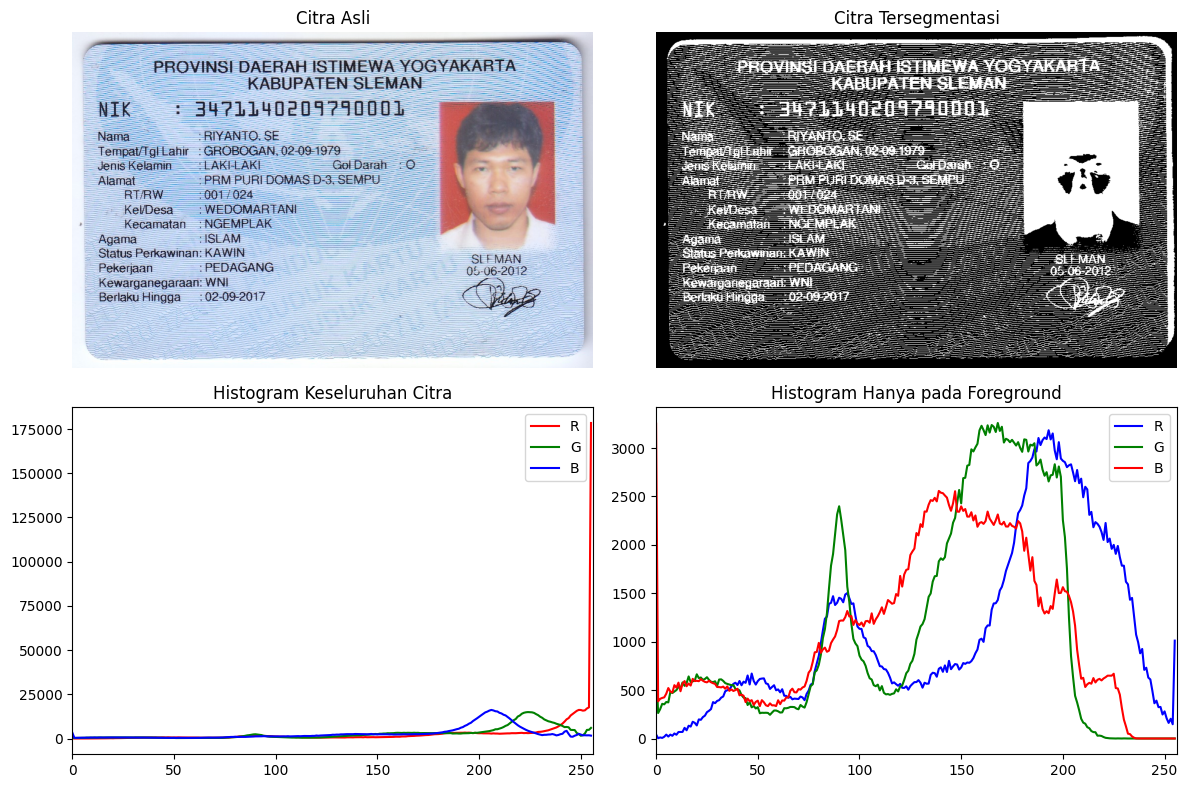

In [42]:
# Load gambar
img = cv.imread('/content/drive/MyDrive/PCVK/ktp/ktp.png', cv.IMREAD_COLOR)

# Ubah ke grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Menerapkan threshold untuk mendapatkan citra tersegmentasi
_, thresholded = cv.threshold(gray_img, 200, 255, cv.THRESH_BINARY_INV)

# Buat mask untuk citra tersegmentasi
mask = np.zeros(gray_img.shape, dtype=np.uint8)
mask[thresholded == 255] = 255

# Hitung histogram citra asli untuk setiap saluran warna
hist_full_r = cv.calcHist([img], [0], None, [256], [0, 256])
hist_full_g = cv.calcHist([img], [1], None, [256], [0, 256])
hist_full_b = cv.calcHist([img], [2], None, [256], [0, 256])

# Hitung histogram citra tersegmentasi untuk setiap saluran warna
hist_segmented_r = cv.calcHist([img], [0], mask, [256], [0, 256])
hist_segmented_g = cv.calcHist([img], [1], mask, [256], [0, 256])
hist_segmented_b = cv.calcHist([img], [2], mask, [256], [0, 256])

# Tampilkan gambar dan histogram
plt.figure(figsize=(12, 8))

# Tampilkan citra asli dan citra tersegmentasi
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Tersegmentasi')
plt.axis('off')

# Tampilkan histogram keseluruhan citra untuk setiap saluran warna
plt.subplot(2, 2, 3)
plt.plot(hist_full_r, color='red')
plt.plot(hist_full_g, color='green')
plt.plot(hist_full_b, color='blue')
plt.title('Histogram Keseluruhan Citra')
plt.xlim([0, 256])
plt.legend(['R', 'G', 'B'])

# Tampilkan histogram hanya pada foreground untuk setiap saluran warna
plt.subplot(2, 2, 4)
plt.plot(hist_segmented_r, color='blue')
plt.plot(hist_segmented_g, color='green')
plt.plot(hist_segmented_b, color='red')
plt.title('Histogram Hanya pada Foreground')
plt.xlim([0, 256])
plt.legend(['R', 'G', 'B'])

# Atur tata letak plot
plt.tight_layout()

# Tampilkan plot
plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7d1fb3677c70>)

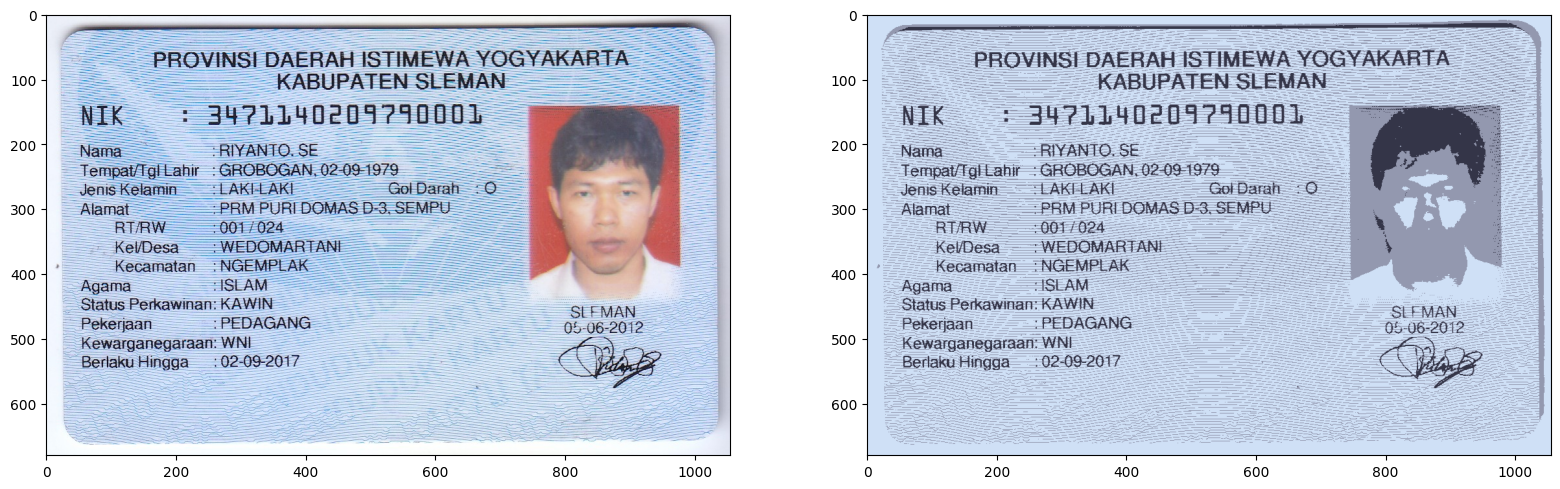

In [44]:
# Load the image using cv2 in RGB
img = cv.imread('/content/drive/MyDrive/PCVK/ktp/ktp.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = img.reshape((-1, 3))

# Convert to floating point
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv.kmeans(pixels, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Map the labels to the centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image
segmented_image = segmented_image.reshape(img.shape)


plt.figure(figsize=(30,30))
plt.subplot(1,3,1),plt.imshow(img)

plt.subplot(1,3,2),plt.imshow(segmented_image)


7. Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang
telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

a. Global Threshold

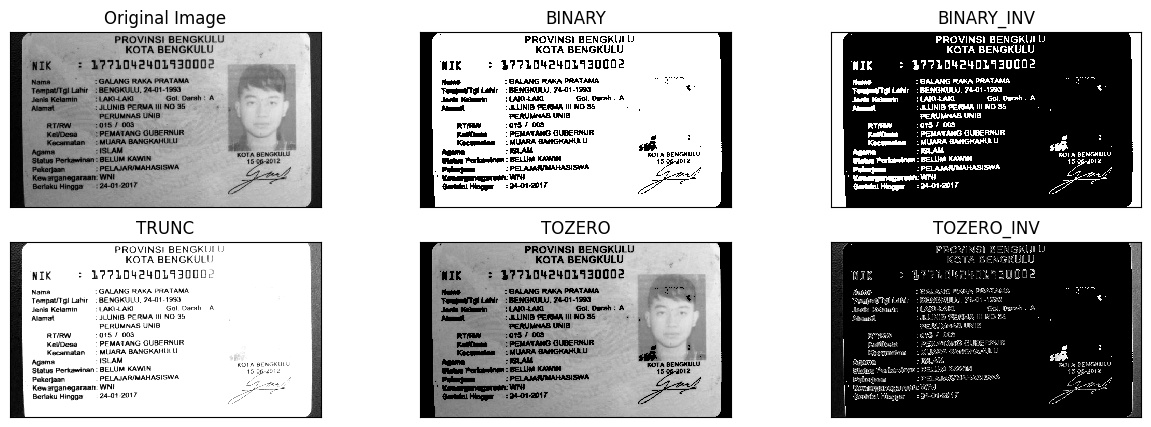

In [47]:
img = cv.imread('/content/drive/MyDrive/PCVK/ktp/ktp1.png', cv.IMREAD_GRAYSCALE)
thresh = 90 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selainitu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)

#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)

#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)

#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)

#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))

for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

b. Adaptive Threshold

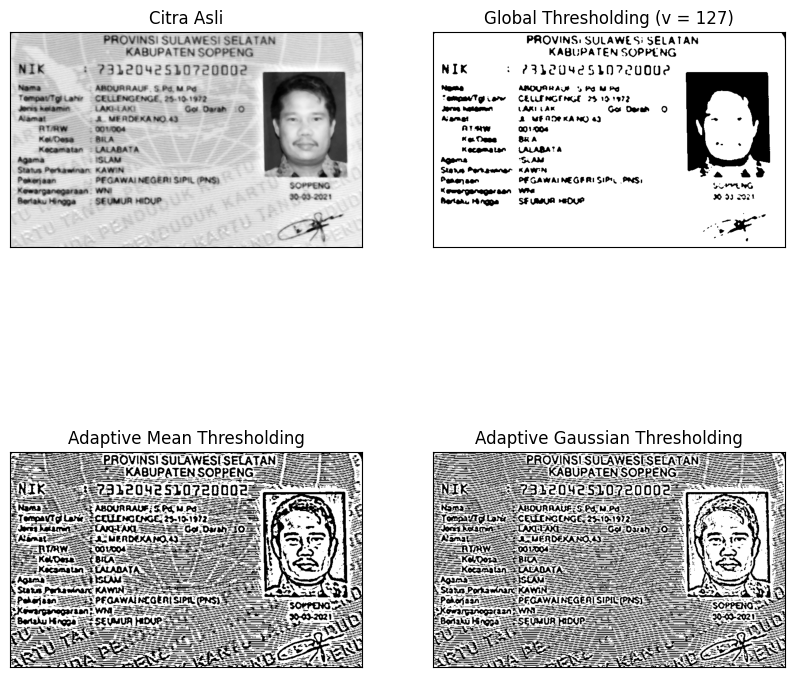

In [48]:
filename = ('/content/drive/MyDrive/PCVK/ktp/KTP7.jpeg')

citra = cv.medianBlur(cv.imread(filename),5)

gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)

#gray = cv.medianBlur(gray,5)
thresh = 127

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)

th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize = (10,10))

for i in range(len(citra2)):
    plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

c. Otsu's Thresholding

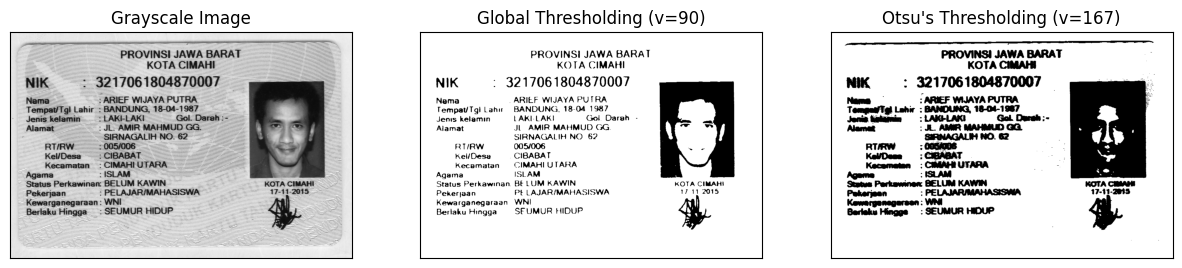

In [49]:
# Load the image using cv2 in grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/ktp/ktp2.png', cv.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to the image
blur = cv.GaussianBlur(img,(5,5),0)

# Set the global threshold value
thresh_global = 90

# Apply global thresholding
global_thresh = blur.copy()
global_thresh[blur > thresh_global] = 255
global_thresh[blur <= thresh_global] = 0

# Set the specific threshold value for Otsu's thresholding
thresh_otsu = 167

# Apply Otsu's thresholding
otsu_thresh = blur.copy()
otsu_thresh[blur > thresh_otsu] = 255
otsu_thresh[blur <= thresh_otsu] = 0

# Display the images
titles = ['Grayscale Image', 'Global Thresholding (v=90)', f"Otsu's Thresholding (v={thresh_otsu})"]
images = [img, global_thresh, otsu_thresh]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


d. K-Means

(<Axes: >, <matplotlib.image.AxesImage at 0x7d1fb2f10070>)

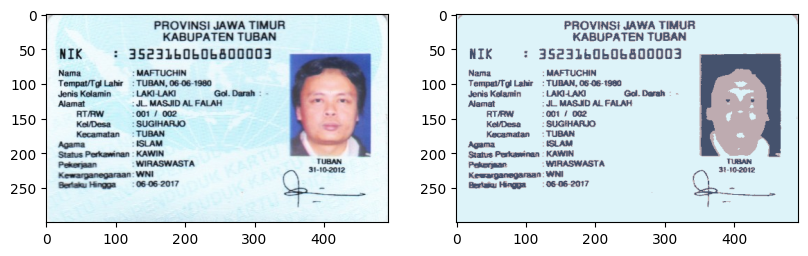

In [50]:
# Load the image using cv2 in RGB
img = cv.imread('/content/drive/MyDrive/PCVK/ktp/ktp4.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = img.reshape((-1, 3))

# Convert to floating point
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv.kmeans(pixels, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Map the labels to the centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image
segmented_image = segmented_image.reshape(img.shape)


plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img)

plt.subplot(1,3,2),plt.imshow(segmented_image)
